# Машинное обучение, DS-поток, осень 2022
## Задание 3.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов
* Задача 4 &mdash; 30 баллов

## Задача 1

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $n$, числа признаков $d$, максимальной глубины дерева $D$. В качестве правил используются пороговые функции $I\{x_j>t\}$. При выборе правил в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значениям этого признака на объектах, попавших в текущую вершину. Для простоты, считайте сложность вычисления критерия информативности по уже построенному множеству объектов константной.

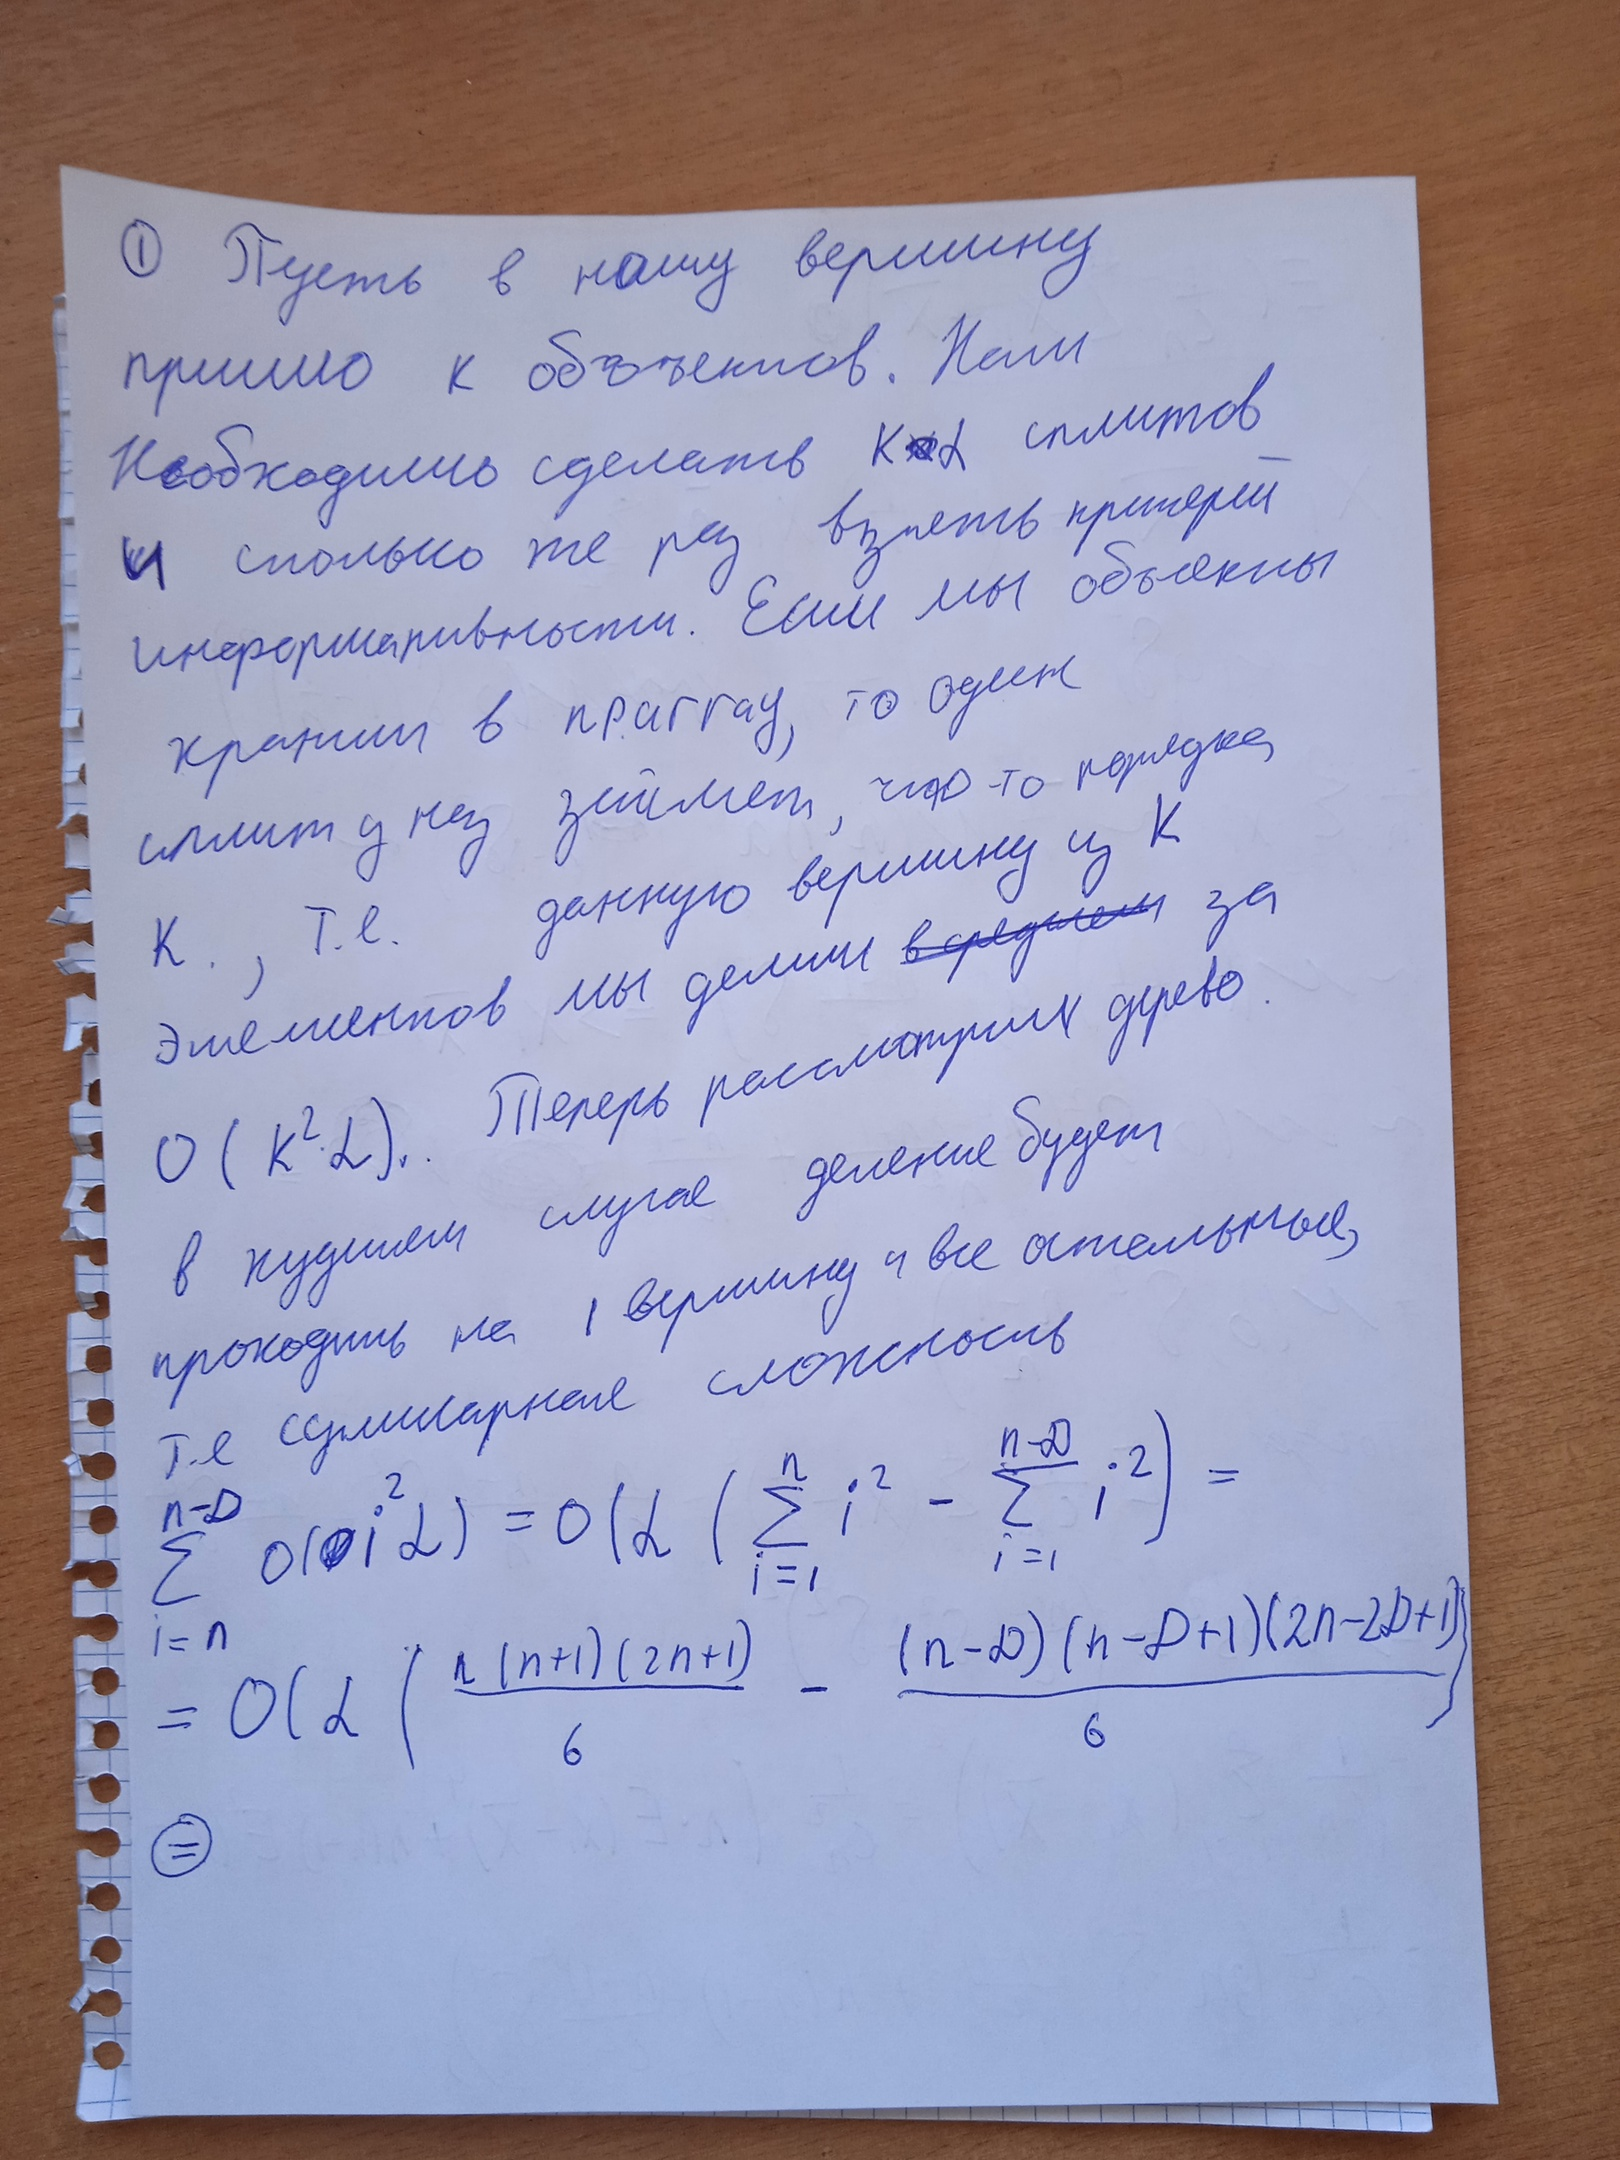

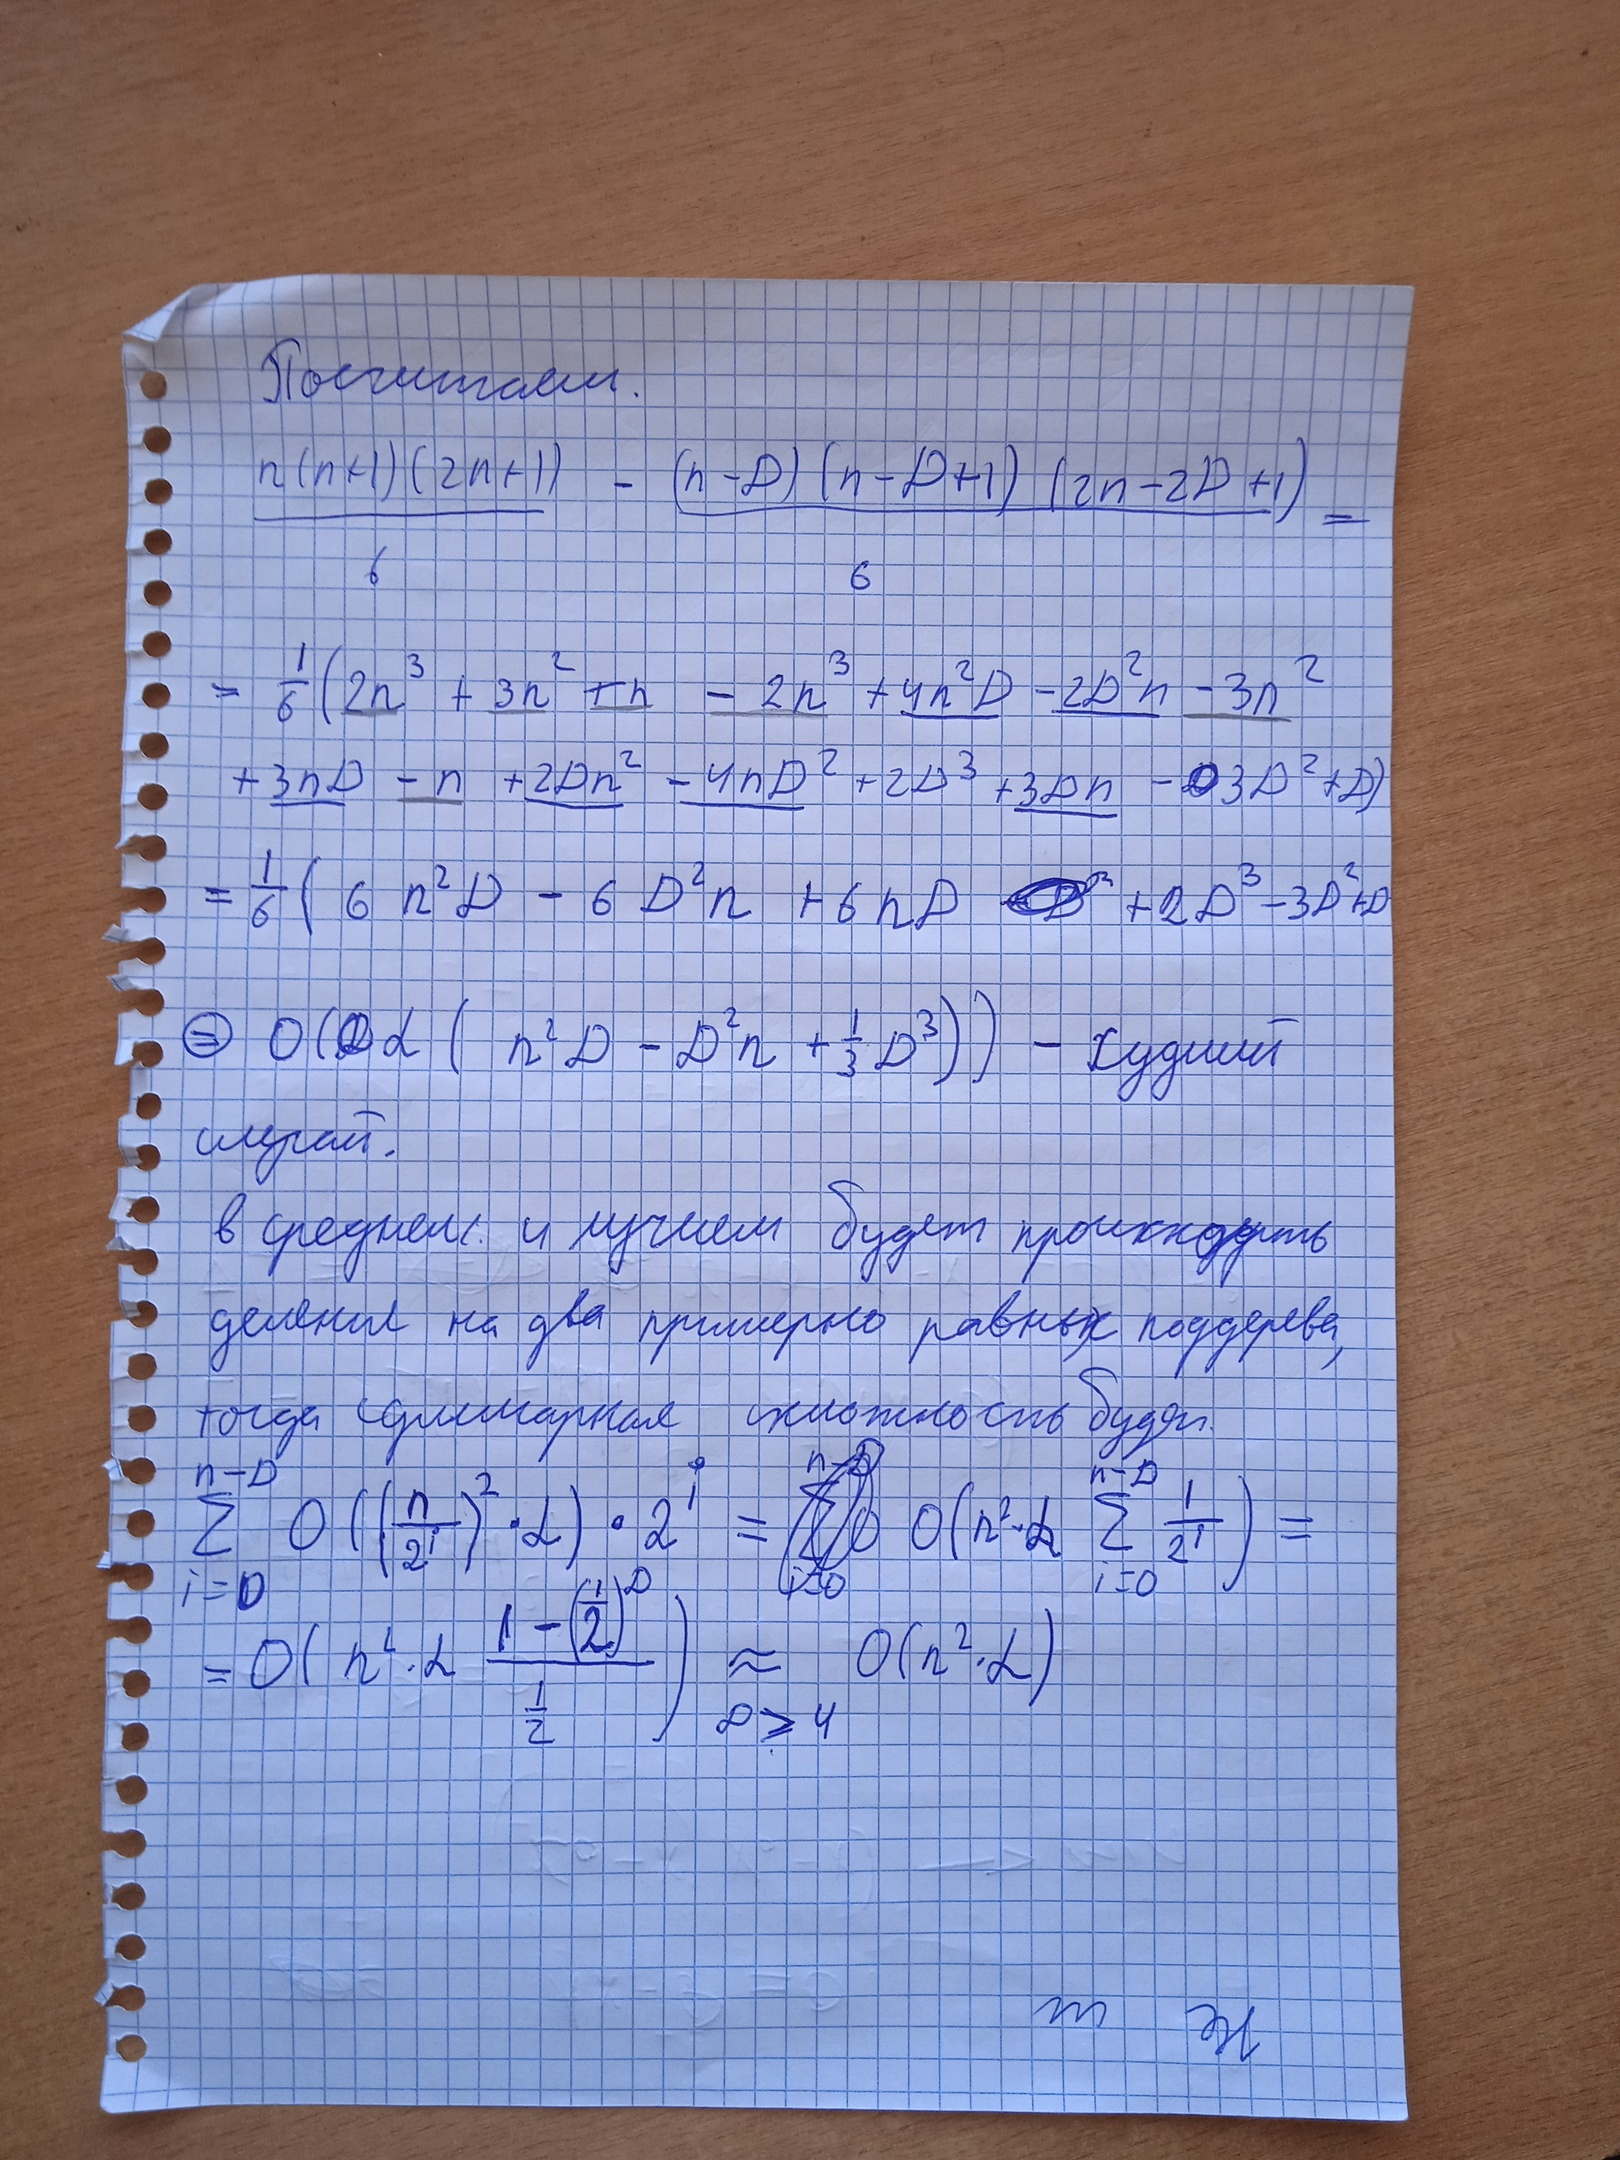

## Задача 2

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $D(\varepsilon_i)$.

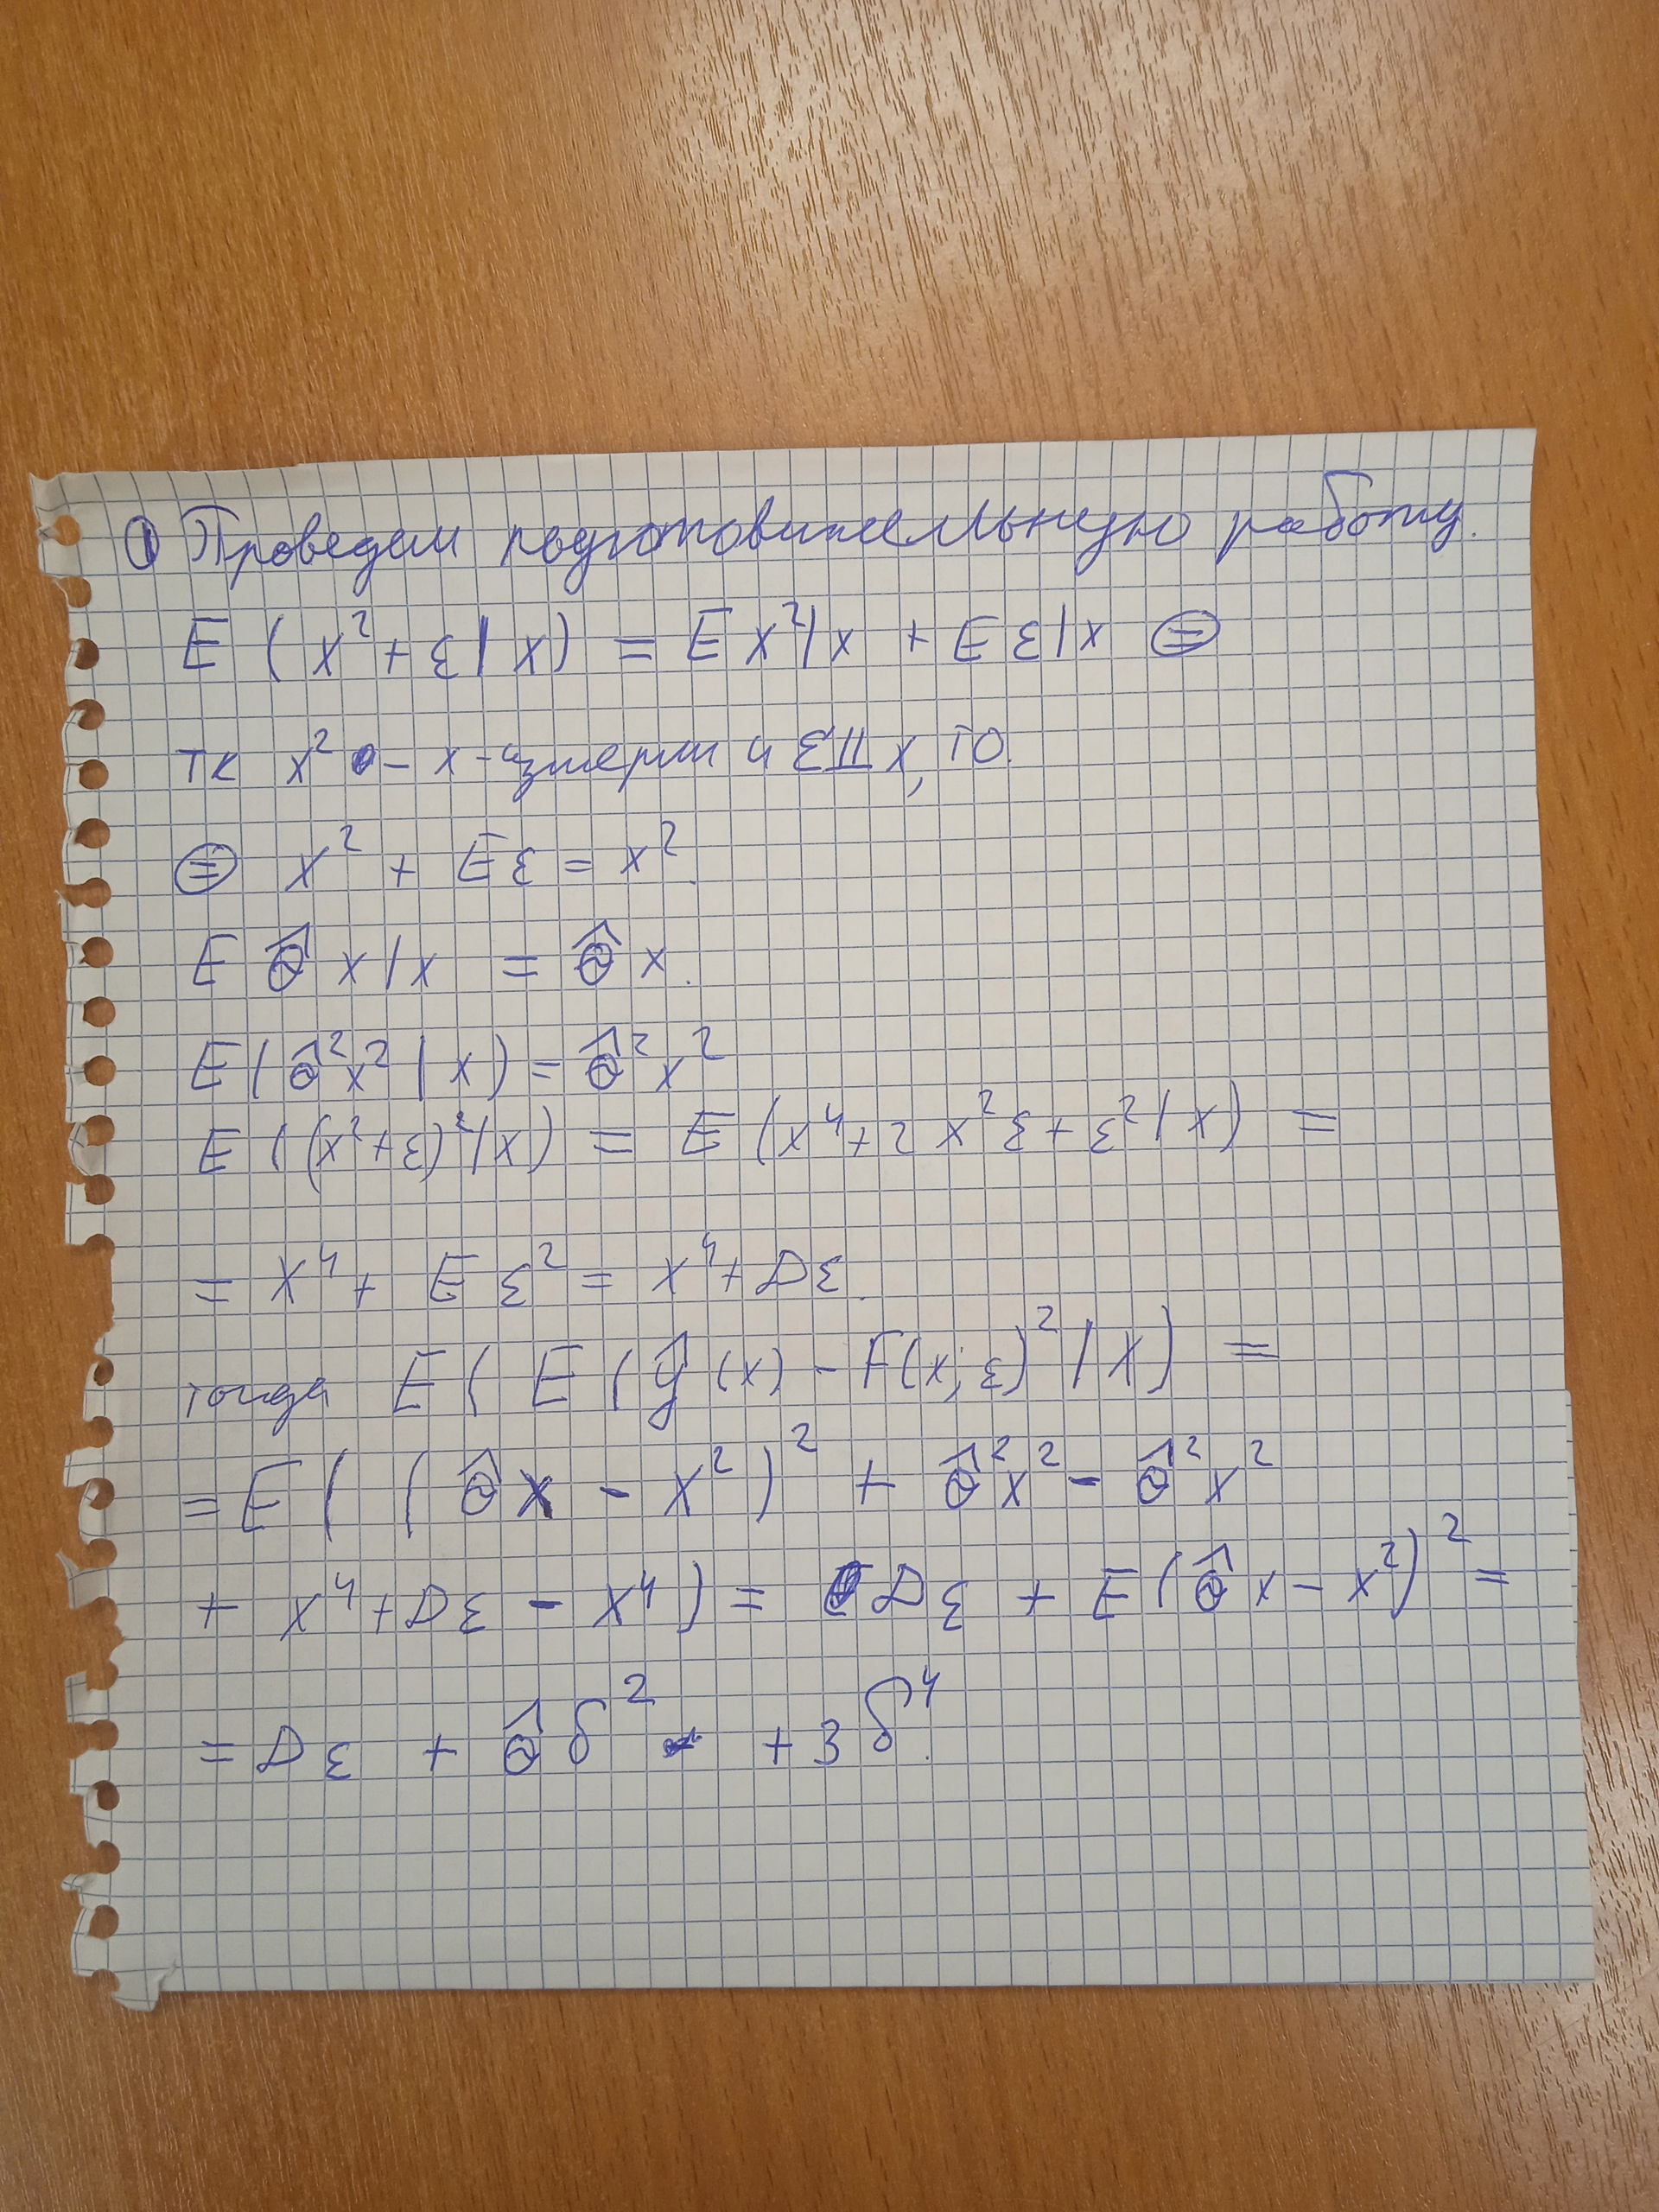

## Задача 3

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [1]:
from tqdm import tqdm
from sklearn.datasets import fetch_california_housing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь один случайный лес. В этом вам поможет аттрибут `_estimators` у обученной модели.

Построим график зависимости MSE от глубины

In [5]:
list_this_test_MSE = list()
max_depth_list = [i  for i in range(3, 25)]
for i in tqdm(max_depth_list):
    model = RandomForestRegressor(max_depth=i)
    model.fit(X_train, y_train)
    list_this_test_MSE.append(MSE(model.predict(X_test), y_test))

100%|██████████| 22/22 [02:28<00:00,  6.73s/it]


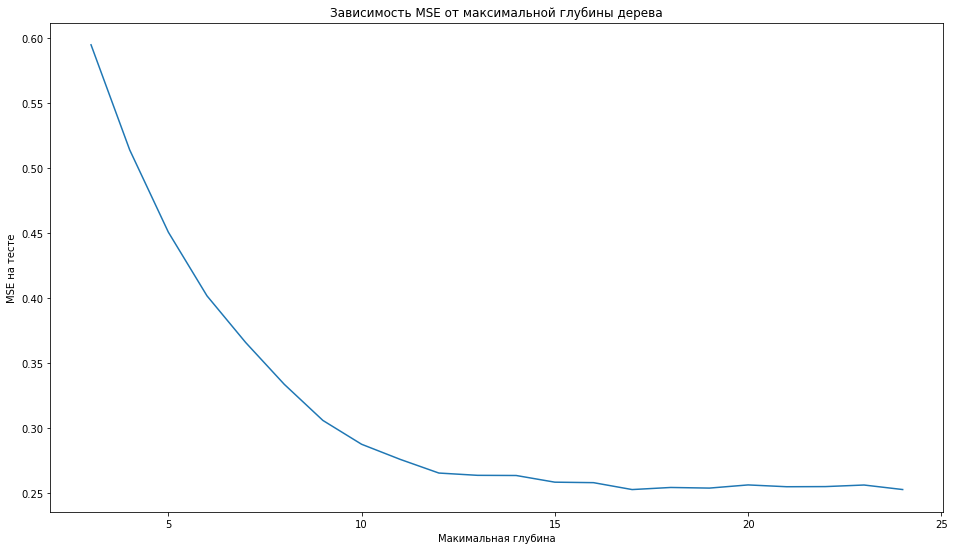

In [6]:
plt.figure(figsize=(16, 9))
plt.plot(max_depth_list, list_this_test_MSE)
plt.title('Зависимость MSE от максимальной глубины дерева')
plt.xlabel('Макимальная глубина')
plt.ylabel('MSE на тесте')
plt.show()

Видно, что в раене 15 достигаеться оптимум далее выходит на плато.

Теперь посмотрим как измениться точность в зависимости от количества деревьев

In [7]:
list_this_count_of_tree = [i for i in range(2, 100)]
model = RandomForestRegressor(n_estimators=1) # создаем рандомный лес из одного дерева
model.fit(X_train, y_train)
list_this_MSE_count_of_tree = list()
list_this_test_MSE_count_tree = list()
for i in tqdm(list_this_count_of_tree):
    model.estimators_.append(DecisionTreeRegressor(splitter='random').fit(X_train, y_train)) #  Я почитал по дефолту и у того и у другого одни параметры
    list_this_test_MSE_count_tree.append(MSE(model.predict(X_test), y_test))

100%|██████████| 98/98 [00:10<00:00,  9.46it/s]


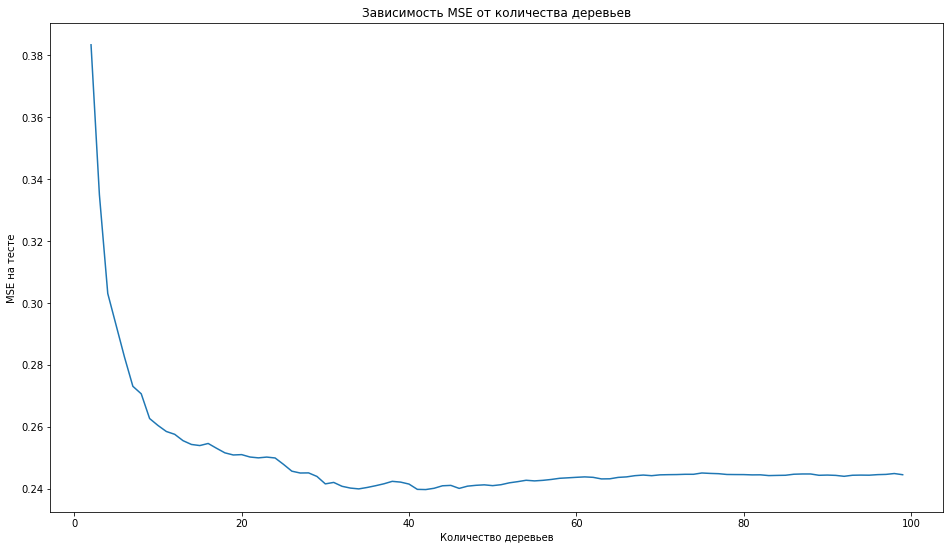

In [8]:
plt.figure(figsize=(16, 9))
plt.plot(list_this_count_of_tree, list_this_test_MSE_count_tree)
plt.title('Зависимость MSE от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE на тесте')
plt.show()

Картина аналогичная глубине, сначало идет резкий спад, а потом практически плато.

Пока я делал, я споткнулся об одни грабли. Я добавлял деревью не с рандомным сплитером, а с лучшем. Вот какая картинка у меня получилась

100%|██████████| 98/98 [00:26<00:00,  3.72it/s]


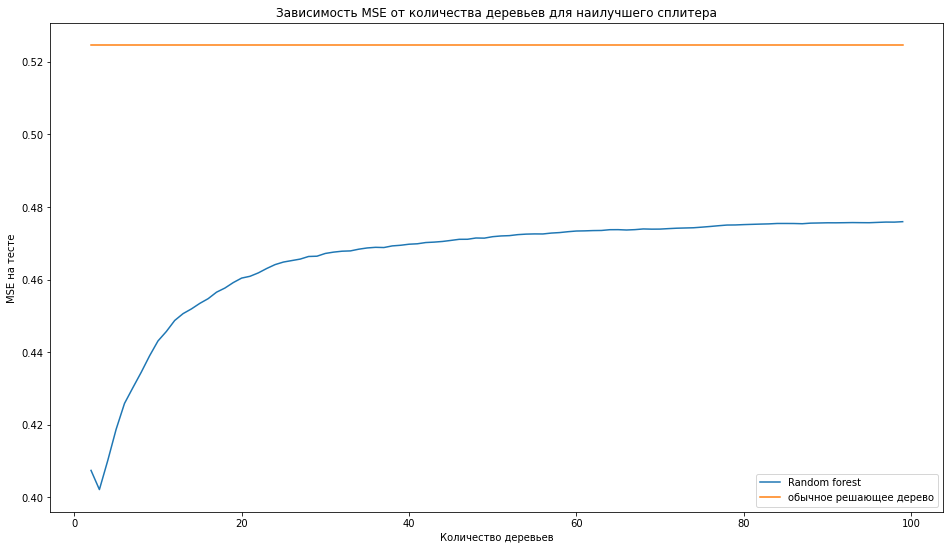

In [9]:
list_this_count_of_tree = [i for i in range(2, 100)]
model = RandomForestRegressor(n_estimators=1) # создаем рандомный лес из одного дерева
model.fit(X_train, y_train)
list_this_MSE_count_of_tree = list()
list_this_test_MSE_count_tree = list()
for i in tqdm(list_this_count_of_tree):
    model.estimators_.append(DecisionTreeRegressor(splitter='best').fit(X_train, y_train)) #  Я почитал по дефолту и у того и у другого одни параметры
    list_this_test_MSE_count_tree.append(MSE(model.predict(X_test), y_test))
plt.figure(figsize=(16, 9))
des_tree = DecisionTreeRegressor(splitter='best').fit(X_train, y_train)
MSE_des_tree = MSE(des_tree.predict(X_test), y_test)
plt.plot(list_this_count_of_tree, list_this_test_MSE_count_tree, label='Random forest')
plt.plot(list_this_count_of_tree, MSE_des_tree + np.zeros(len(list_this_test_MSE_count_tree)), label='обычное решающее дерево')
plt.title('Зависимость MSE от количества деревьев для наилучшего сплитера')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE на тесте')
plt.legend()
plt.show()

Очень странно. Мне казалось, что синяя кривая должна стремиться к красной, однако это не так. Плюс если провести рнесколько экспериментов видно, что красная кривая меняет свое положение отрносительно синей. Она то ниже то выше нее. Не совсем понятно, как это объяснить, однако это просто интересный факт не имеющий к заданию прямого отнашения.

Прочитав чатик, я понялЮ что немного не правильно изменял количество деревьев в лесе. Нарисую еще один график.

In [58]:
def predict(list_this_model, X, count_of_model):
    result = 0
    for i in range(count_of_model):
        result += list_this_model[i].predict(X)
    return result / count_of_model

In [65]:
model =  RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
list_this_MSE_count_of_tree_right = list()
for i in tqdm(list_this_count_of_tree):
    list_this_MSE_count_of_tree_right.append(MSE(predict(model.estimators_, X_test, i) , y_test))

100%|██████████| 98/98 [00:06<00:00, 14.81it/s] 


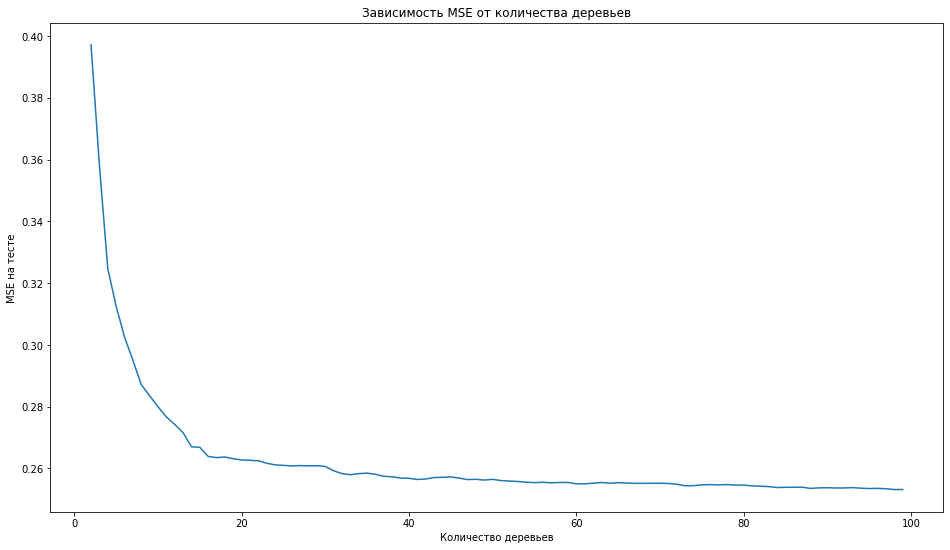

In [66]:
plt.figure(figsize=(16, 9))
plt.plot(list_this_count_of_tree, list_this_MSE_count_of_tree_right)
plt.title('Зависимость MSE от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE на тесте')
plt.show()

Собственно, ничего не поменялось, но теперь вы мне не снизите балл.

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:**  На двух других графиках можно увидеть закономерность в том, что сначало наша моделька резко становиться лучше, а потом выходит на плато. При дальнейшем увиличении глубины в дереве, буде данные очень шумные все равно произойдет переобучение и падение точности на тесте, при увиличении количества деревьев ничего плохого не произойдет точность будет почти монотонно не убывать, что доказывает формула которую мы вывели на занятии $VAR(forest) = D_{\hat{y_1}}\cdot(\frac1T - \frac{T-1}{T}\cdot cor(\hat{y_1}, \hat{y_2}))$. И равенства баеса смещению одной модели в независимости от количества деревьев. Так вот при добавлении еще одного дерева, буде оно коррелировано с уже имеющимися мы ничего не приобретем, однако и нечего не потеряем, а если нам повезет и мы добавим не коррелированное, то мы тогда уменьшим нашу дисперсию. Случайный лес тоже может переобучиться при достаточно большой глубине и большом шуме в данных.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [10]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
print('MSE для 1-ой модели ', MSE(model1.predict(X_test), y_test))

MSE для 1-ой модели  0.2537672313671606


In [11]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
print('MSE для 2-ой модели ', MSE(model2.predict(X_test), y_test))

MSE для 2-ой модели  0.25515794847225504


In [12]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
print('MSE для 3-ой модели ', MSE(model3.predict(X_test), y_test))

MSE для 3-ой модели  0.2523175970772139


Давайте для сравнения обучим три обычных решающих дерева.

In [13]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
print('MSE для 1-ой модели ', MSE(model1.predict(X_test), y_test))

MSE для 1-ой модели  0.5153801278370542


In [14]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
print('MSE для 2-ой модели ', MSE(model2.predict(X_test), y_test))

MSE для 2-ой модели  0.5100166212516278


In [15]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
print('MSE для 3-ой модели ', MSE(model3.predict(X_test), y_test))

MSE для 3-ой модели  0.5146875588836046


**Ответ:** Детерминированность результатат и на обычных решающих деревьях и на решающем лесе порядка тысячной. Давайте обсудим случайности которые там могут быть. Ну в решающем лесе в котором количество признаков, по которому происходит разбиение равно количеству признаков выборки случайность согласно документации может быть только в том случае, если у двух разбиений улучшение критерия одинаково. Теперь про случайность в случайном лесе. Ну во первых, как мы убедились в нем используеться не "best", a "random" spliter. Что детерминированности не прибавляет, плюс там еще случайность, лежащая в случайности каждого из решающих деревьев. Плюс сплит происходит по случайному признаку. Но, так как мы проводим опыт много раз среднее получаеться почти одинаковым.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

Из графика видно, что брать глубину больше 15 и количество деревьев больше 60 смысла особого нет. Вообще количество деревьев запихивать в сетку особого смысла нет, так как выдасться наибольшее, но задание есть задание.

In [17]:
%time
max_depth_grid = np.arange(1, 20)
n_estimators_grid = np.arange(1, 80, 1)
params_grid = {'max_depth' : max_depth_grid, 'n_estimators' : n_estimators_grid}
result = GridSearchCV(estimator=RandomForestRegressor(), param_grid = params_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
result.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Fitting 5 folds for each of 1501 candidates, totalling 7505 fits


GridSearchCV(error_score='raise', estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
             scoring='neg_mean_squared_error', verbose=2)

Выведите найденные оптимальные параметры.

In [18]:
best_model = result.best_estimator_
print('Лучшее число деревьев ', best_model.n_estimators, ' Лучшая максимальная глубина ', best_model.max_depth)

Лучшее число деревьев  77  Лучшая максимальная глубина  18


Ну вобщем-то как я и говорил количество деревьев близко к максимаольному, ну ладно зато мы в этом убедились.

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [29]:
max_depth = 18
n_estimators = 77

Оценим качество предсказаний обученного решающего леса.

In [31]:
MSE(best_model.predict(X_test), y_test)

0.2528216704367826

Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [54]:
count_of_fitch = np.arange(1, 9)
list_of_MSE_fitch = list()
for i in tqdm(count_of_fitch):
    model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, max_features=i).fit(X_train, y_train)
    list_of_MSE_fitch.append(MSE(model.predict(X_test), y_test))

100%|██████████| 8/8 [00:29<00:00,  3.63s/it]


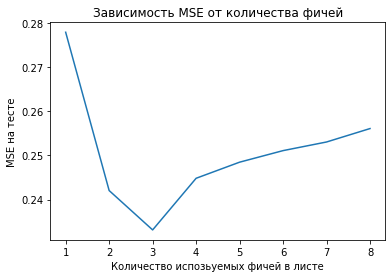

In [55]:
plt.plot(count_of_fitch, list_of_MSE_fitch)
plt.title('Зависимость MSE от количества фичей')
plt.xlabel('Количество испозьуемых фичей в листе')
plt.ylabel('MSE на тесте')
plt.show()

Мы видим убывание, до некоторого уровня, а потом возростание. Убывание связано с уменьшением дисперсии, дальнейшее возрастание с сильной коррелируемостью моделей.

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** Ну вроде про почему такими я по рассуждал выше, что касаеться велечины n_feature. За исключением случайного сплита у нас могут получиться количество деревьев порядка $log(n_{experiment}) * C_n^8$. 

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики `mse` на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [67]:
count_of_fitch = np.arange(1, 9)
list_of_MSE_fitch = list()
list_of_train_MSE = list()
for i in tqdm(count_of_fitch):
    model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=max_depth), max_features=i, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    list_of_MSE_fitch.append(MSE(model.predict(X_test), y_test))
    list_of_train_MSE.append(MSE(model.predict(X_train), y_train))

100%|██████████| 8/8 [00:30<00:00,  3.87s/it]


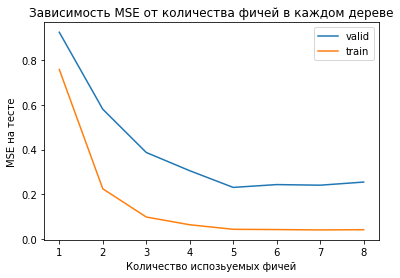

In [69]:
plt.plot(count_of_fitch, list_of_MSE_fitch, label = 'valid')
plt.plot(count_of_fitch, list_of_train_MSE, label='train')
plt.title('Зависимость MSE от количества фичей в каждом дереве')
plt.xlabel('Количество испозьуемых фичей')
plt.ylabel('MSE на тесте')
plt.legend()
plt.show()

Здесь же идет монотонное уменьшение ошибки. Но значение все равно хуже чем в MSE, что связано с большой кореляцией моделей между собой.

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

**Вывод.**

Такой подход плох тем, что у нас все модели сильно корелируют между собой, из-за чего общая дисперсия хуже чем при разбиении в каждой вершине.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

В первом случае мы ставим ограничение на количество признаков, по которым обучаеться одна модель, во втором мы решаем по скольким признаком будем сплитеть в листе.

**Итоговый вывод** Мы посмотрели на зависимость радномного леса от его глубины, количества деревьев и количество фичей используемых при обучении. Коссвенно подтвердили истиннойсть формулы, выведенной на занятии.

## Задача 4

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.25)

Вообще, мы обычно используем Ridge регрессию когда хотим снизить дисперсию, за счет увеличения bias. Но кажеться, что в бегинге допустима большая дисперсия если biais не велик. Ну ладно, вам виднее. Давайте сначало найдем оптимальную $\alpha$ для нашей модели.

In [11]:
alpha_grid = np.linspace(0, 0.1, 10000)
params_grid = {'model__alpha' : alpha_grid}
first_model = Pipeline(steps=[('Normolise', StandardScaler()), ('model', Ridge())])
result = GridSearchCV(estimator=first_model, param_grid = params_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, error_score='raise')
result.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('Normolise', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.00000000e+00, 1.00010001e-05, 2.00020002e-05, ...,
       9.99799980e-02, 9.99899990e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error', verbose=2)

Выведем наилучшие параметры. И посмотрим на качество модели на тесте.

In [14]:
model = result.best_estimator_
print(result.best_params_)

{'model__alpha': 0.1}


In [15]:
MSE(model.predict(X_test), y_test)

0.49370877423894516

$\alpha$ вывелся максимальный из всех возможных, что говорит о сильной линейной зависимости данных. Брать его больше я не буду, так как тогда получиться не оправданно большой bias, и если дисперсию у нас еще есть шанс уменьшить, то bias уменьшить мы уже не сможем.

Так как данные для регресии нужно стандартизировать, в качестве базовой модели будем использовать pipline в котором будет лежать сначало стандартизатор, потом Ridge регрессия. Внесем случайность во первых использованием случайного стандартизатора, который напишем ниже, во вторых будем брать разные $\alpha$ не превосходящие 0.1.

Начнем с написания случайного стадартизатора. Его случайность будет заключаться в том, что он при обучении будет вызывать fit или от Standart_scale или от max_abs_scaler.

In [5]:
class Random_Standartisation:
    def __init__(self):
        pass
    
    def fit(self, X, y=None, sample_weight=None):
        self.ways = np.random.randint(2) #если 0, то Standart_scale если 1, то max_abs
        if (self.ways == 1):
            self.model = MaxAbsScaler()
        else:
            self.model = StandardScaler()
        self.model.fit(X_train)
        
    def transform(self, X):
        return self.model.transform(X)
    
    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X)
        return self.transform(X)

Создадим обертку над Ridge регрессией, присваевающую ей рандомную альфу

In [6]:
class Random_Ridge:
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        self.alpha = np.random.rand() / 10
        self.model = Ridge(alpha=self.alpha)
        self.model.fit(X_train, y_train)
        
    def predict(self, X):
        return self.model.predict(X)

Запихнем эту красоту в Pipeline

In [7]:
base_model = Pipeline(steps=[('Normolise', Random_Standartisation()), ('model', Random_Ridge())])

Создадим и обучим ансамбль из этих регрессий

In [8]:
ridge_model = BaggingRegressor(base_estimator=base_model, n_estimators=100)

In [9]:
ridge_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=Pipeline(steps=[('Normolise',
                                                 <__main__.Random_Standartisation object at 0x7f32733d4190>),
                                                ('model',
                                                 <__main__.Random_Ridge object at 0x7f32733d40d0>)]),
                 n_estimators=100)

In [10]:
MSE(ridge_model.predict(X_test), y_test)

0.5296135414531666

Ну такое... Пренибригая сдвигом будем считать отношением дисперсий отношение MSE.

In [11]:
MSE(ridge_model.estimators_[0].predict(X_test), y_test)/MSE(ridge_model.predict(X_test), y_test)

0.9966886238394378

Примерно тоже самое. Грусна(. Давайте посмотрим на матрицу ковариаций. Получим ее последовательным применением каждого эстиматора к тестовым данным

In [12]:
result_work = list()
for i in tqdm(ridge_model.estimators_):
    result_work.append(i.predict(X_test))
result_work = np.array(result_work)

100%|██████████| 100/100 [00:00<00:00, 2290.96it/s]


In [13]:
ridge_cor = np.corrcoef(result_work)

Переведем данные в одномерный маассив, удалим 100 еденичек, нарисуем гистограмму

In [14]:
ridge_cor = ridge_cor.reshape(len(ridge_cor)**2)
ridge_cor = np.sort(ridge_cor)[:-100]

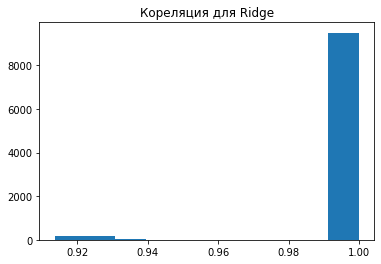

In [15]:
plt.hist(ridge_cor)
plt.title('Кореляция для Ridge')
plt.show()

Очевидно, что данные очень сильно корелированны. Это плохо, но соответсвует эксперименту. Есть вариант добавить случайность увеличив диапазон возможных значений для $\alpha$, но тогда мы будем сильно менять bias, чего бы очень не хотелось.

Исследуем Randomforest. Ничего докручивать там не будем, так как он и так не плох.

In [16]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Посмотрим на отношение дисперсий.

In [17]:
MSE(model.estimators_[0].predict(X_test), y_test) / MSE(model.predict(X_test), y_test)

2.4257139842507844

Дисперсия леса почти в два c половиной раза меньше дисперсии одного элемента

In [18]:
result_work = list()
for i in tqdm(model.estimators_):
    result_work.append(i.predict(X_test))
result_work = np.array(result_work)

100%|██████████| 100/100 [00:00<00:00, 621.86it/s]


In [19]:
forest_cor = np.corrcoef(result_work)

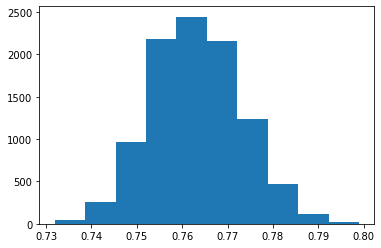

In [20]:
forest_cor = forest_cor.reshape(len(forest_cor)**2)
forest_cor = np.sort(forest_cor)[:-100]
plt.hist(forest_cor)
plt.show()

Видно, что максимум корреляции здесь в раене 0.76 против почи 1 у Ridge. 

**Вывод** Со всему ухищьрениями не удалось понизить кореляцию моделей, обученных риджом, а обычный случайный лес оказался на много лучше.